$$
\renewcommand{\vvec}[2]{\left[ \begin{array}{c} \mathbf{#1}\\ \mathbf{#2} \end{array}\right]}
\renewcommand{\mmat}[4]{\left[ \begin{array}{cc} \mathbf{#1}&\mathbf{#2}\\ \mathbf{#3}&\mathbf{#4} \end{array}\right]}
\renewcommand{\aaa}{\mathbf{a}}
\renewcommand{\AAA}{\mathbf{A}}
\renewcommand{\xyvec}{\left[ \begin{array}{c} \xx\\\yy \end{array} \right]}
\renewcommand{\xyvecc}{\left[ \begin{array}{c} x^1\\y^1 \end{array} \right]}
\renewcommand{\mm}{\mathbf{m}}
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\ee}{\mathbf{e}}
\renewcommand{\ww}{\mathbf{w}}
\renewcommand{\XX}{\mathbf{X}}
\renewcommand{\YY}{\mathbf{Y}}
\renewcommand{\WW}{\mathbf{W}}
\renewcommand{\VV}{\mathbf{V}}
\renewcommand{\DD}{\mathbf{D}}
\renewcommand{\dd}{\mathbf{d}}
\renewcommand{\ZZ}{\mathbf{Z}}
\renewcommand{\CC}{\mathbf{C}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\ddelta}{\boldsymbol{\mathbf{\delta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\EE}{\mathbb{E}}
\renewcommand{\EEE}{\mathbf{E}}
\renewcommand{\KL}{\textrm{KL}}
\renewcommand{\Bound}{\mathcal{B}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\corr}[2]{\textrm{corr}(#1,#2)}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
\renewcommand{\argmax}{\mathop{\textrm{argmax}}}
\renewcommand{\new}{\textrm{new}}
\renewcommand{\old}{\textrm{old}}
\renewcommand{\bb}{\mathbf{b}}
\renewcommand{\ba}{\mathbf{a}}
\renewcommand{\bg}{\mathbf{g}}
\renewcommand{\BB}{\mathbf{B}}
\renewcommand{\BA}{\mathbf{A}}
\renewcommand{\BC}{\mathbf{C}}
\renewcommand{\UU}{\mathbf{U}}
\renewcommand{\uu}{\mathbf{u}}
\renewcommand{\hh}{\mathbf{h}}
\renewcommand{\SSS}{\mathbf{S}}
\renewcommand{\sss}{\mathbf{s}}
\renewcommand{\rr}{\mathbf{r}}
\renewcommand{\tr}[1]{\textrm{tr}\left\{#1\right\}}
\renewcommand{\argmin}{\mathop{\textrm{argmin}}}
\renewcommand{\abs}[1]{\left\lvert#1\right\rvert}
\renewcommand{\sign}[1]{\textrm{sign}\left(#1\right)}
\renewcommand{\minimize}{\mathop{\textrm{minimize}}}
\renewcommand{\subjectto}{\mathop{\textrm{subject to}}}
\renewcommand{\relu}{\textrm{ReLU}}
$$


First Name: YoungJoong
    
Last Name: Kwon
    
PID: 730262855

Colaborated with: None




# Introduction
 Understanding image and video leads to better reconstruction of the physical world.
Previous methods focus largely on geometry and visual appearance of the reconstructed scene.
In this work, we present a method to recover the material properties of cloth from a video. 
Previous cloth material recovery methods often require markers or complex experimental set-up to acquire physical properties, or are limited to certain types of images or videos.
Our approach takes advantages of the appearance changes of the moving cloth to infer its physical properties. 
To extract information about the cloth, our method characterizes both the motion and the visual appearance of the cloth geometry. 
We apply the Residual Network (ResNet) and the Long Short Term Memory (LSTM) neural network to material recovery of cloth from videos. 

# Overview of Our Method
Our cloth material recovery method learns an appearance-to-material mapping model from a set of training samples. With the learned mapping model, we perform material-type prediction given a recorded video of cloth motion.

![Overview](overview.png)

# Learning Method
 In this section, we explain how to establish the mapping between the visual appearance of a moving cloth and its material label using deep neural network.

## Deep Neural Network Structure 
### Design Rationale
 We propose to combine ResNet with LSTM for our appearance-to-material learning. CNN is used to extract both low- and high-level visual features. LSTM part of the network focuses on temporal motion pattern learning. In the following section, we will briefly introduce our network structure.
### Residual Network for Hierarchical Visual Feature Learning: 
The basis of the convolutional operation serves as a filtering operation on an image. Layers of convolutional neural network (CNN) with convolutional kernels of different dimensions extract features at various levels of details. 

We applied a ResNet for its ability in hierarchical visual feature selection. However, We removed the fully connected layer of the last stage and directly feed the output of the average pooling layer into each LSTM cell.
### Recurrent Neural Network for Sequential Pattern Learning:
A single image contains a limited amount of information concerning the physics properties of a piece of cloth. But a video can be more powerful to demonstrate how the physics properties, such as the material peoperties of a piece of cloth, can affect its motions. To approximate this mapping between the material properties of the cloth and its sequential movement, we apply the recurrent neural network. Unlike the feed-forward neural network, the recurrent neural network has a feedback loop. The loop connects the output of the current cell to the input of the cell at the next step. The feedback loop act as the "memory" of the recurrent neural network. With the "memory", the recurrent neural network has the ability to gradually extract the pattern of the input sequence. 

Following the intuition behind the recurrent neural network, we choose the LSTM instead of the traditional recurrent neural network architecture for its ability to deal with vanishing/exploding gradient and fast convergence to learn the pattern in temporal sequence of data.

# Dataset
We processed MIT Real Fabric Dataset (http://people.csail.mit.edu/klbouman/pw/projects/materialproperties/dataset.html) to make our own dataset. 
MIT Real Fabric Dataset consists of 2-3 minuates 90 videos of the 30 different fabrics moving in response to each of the 3 different strengths of wind force. 
We subsampled 15 frames from each video and made total 26,136 (about 800 - 900 videos for each material class) small videos. 

![dataset example](dataset_example.jpg)

We used a training, validation, and testing split of 70% / 5% / 25% , respectively. 

# Experiments
 We implemented our method using the Pytorch deep neural network framework. We trained our network with NVDIA-Titanx$^{TM}$ GPU.
For every epoch, we trained the model and validated the model on validation dataset (1292 videos).
As shown in the graph below, model trained at epoch 3 (model3) performed best on validation set with 99% accuracy. Therefore, we chose model3 to use in the testing. 


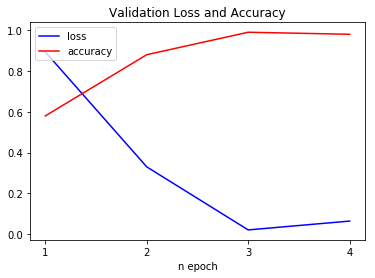

In [9]:
import numpy as np
import matplotlib.pyplot as plt

lst_iter = [1,2,3,4]
lst_loss=[0.8935, 0.3302, 0.0212, 0.0645]
lst_acc =[0.58, 0.88, 0.99, 0.98]

title = "Validation Loss and Accuracy"
plt.plot(lst_iter, lst_loss, '-b', label='loss')
plt.plot(lst_iter, lst_acc, '-r', label='accuracy')

plt.xticks([1,2,3,4])
plt.xlabel("n epoch")
plt.legend(loc='upper left')
plt.title(title)

# save image
plt.savefig(title+".png")  # should before show method

# show
plt.show()

# Project Description
data_processing.ipynb is the code that was used to process dataset. We used main.py to training and validating the model. test.py is the code that can be used to test the model3.
## guide to test model3
If you want to test model3 :

1)download the whole project into the root folder that you want. Open the test.py and change the "ROOTPATH" variable of the line 25 to your own absolute path to root folder.

2)download "MIT Fabric Dataset Index", "MIT Fabric Dataset Processed", "MIT Fabric Models" folders into your root folder.

3)run test.py 